# WIND AND SOLAR FOR ALL EU COUNTRIES, 2015-2020, ENTSO-E
ENTSO-E data for each country containing capacity and generation for wind and solar for each European country (except North Macedonia)

In [617]:
# Importing packages
import atlite
import xarray as xr
import pandas as pd
import scipy.sparse as sp
import numpy as np

import pgeocode
from collections import OrderedDict
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

sns.set_style("whitegrid")

import requests
import os
import zipfile


Creating a function that will download data from url and save it.

In [618]:
# Defining function that helps download date from an url that downloads a .csv file
def download_file(url, local_filename):
    # variant of http://stackoverflow.com/a/16696317
    if not os.path.exists(local_filename):
        r = requests.get(url, stream=True)
        with open(local_filename, "wb") as f:
            for chunk in r.iter_content(chunk_size=1024):
                if chunk:
                    f.write(chunk)
    return local_filename

Downloading data from ENTSO-E using https://data.open-power-system-data.org/
(Download and then go into downloads in chrome and copy link)

In [619]:
opsd= download_file(
    "https://data.open-power-system-data.org/index.php?package=time_series&version=2020-10-06&action=customDownload&resource=3&filter%5B_contentfilter_cet_cest_timestamp%5D%5Bfrom%5D=2015-01-01&filter%5B_contentfilter_cet_cest_timestamp%5D%5Bto%5D=2020-10-01&filter%5BRegion%5D%5B%5D=AT&filter%5BRegion%5D%5B%5D=BE&filter%5BRegion%5D%5B%5D=BG&filter%5BRegion%5D%5B%5D=CH&filter%5BRegion%5D%5B%5D=CY&filter%5BRegion%5D%5B%5D=CZ&filter%5BRegion%5D%5B%5D=DE&filter%5BRegion%5D%5B%5D=DK&filter%5BRegion%5D%5B%5D=EE&filter%5BRegion%5D%5B%5D=ES&filter%5BRegion%5D%5B%5D=FI&filter%5BRegion%5D%5B%5D=FR&filter%5BRegion%5D%5B%5D=GB_GBN&filter%5BRegion%5D%5B%5D=GB_NIR&filter%5BRegion%5D%5B%5D=GR&filter%5BRegion%5D%5B%5D=HR&filter%5BRegion%5D%5B%5D=HU&filter%5BRegion%5D%5B%5D=IE&filter%5BRegion%5D%5B%5D=IT&filter%5BRegion%5D%5B%5D=LT&filter%5BRegion%5D%5B%5D=LU&filter%5BRegion%5D%5B%5D=LV&filter%5BRegion%5D%5B%5D=ME&filter%5BRegion%5D%5B%5D=NL&filter%5BRegion%5D%5B%5D=NO&filter%5BRegion%5D%5B%5D=PL&filter%5BRegion%5D%5B%5D=PT&filter%5BRegion%5D%5B%5D=RO&filter%5BRegion%5D%5B%5D=RS&filter%5BRegion%5D%5B%5D=SE&filter%5BRegion%5D%5B%5D=SI&filter%5BRegion%5D%5B%5D=SK&filter%5BRegion%5D%5B%5D=UA&filter%5BVariable%5D%5B%5D=load_actual_entsoe_transparency&filter%5BVariable%5D%5B%5D=solar_capacity&filter%5BVariable%5D%5B%5D=solar_generation_actual&filter%5BVariable%5D%5B%5D=wind_capacity&filter%5BVariable%5D%5B%5D=wind_generation_actual&filter%5BVariable%5D%5B%5D=wind_offshore_capacity&filter%5BVariable%5D%5B%5D=wind_offshore_generation_actual&filter%5BVariable%5D%5B%5D=wind_onshore_capacity&filter%5BVariable%5D%5B%5D=wind_onshore_generation_actual&downloadCSV=Download+CSV",
    "time_series_EU_wind_solar.csv",
)

Formatting the data better: 

In [620]:
opsd = pd.read_csv(opsd, parse_dates=True,header=0, index_col=0)
opsd.index = opsd.index.tz_convert(None) #Getting time in UTC
opsd = opsd.fillna(0) #Replacing NaN with 0

In [621]:
# Printing full dataframe
pd.set_option('display.max_columns',None)
opsd.head(50)

,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_solar_generation_actual,BE_wind_generation_actual,BE_wind_offshore_generation_actual,BE_wind_onshore_generation_actual,BG_load_actual_entsoe_transparency,BG_solar_generation_actual,BG_wind_onshore_generation_actual,CH_load_actual_entsoe_transparency,CH_solar_capacity,CH_solar_generation_actual,CH_wind_onshore_capacity,CH_wind_onshore_generation_actual,CY_load_actual_entsoe_transparency,CY_wind_onshore_generation_actual,CZ_load_actual_entsoe_transparency,CZ_solar_generation_actual,CZ_wind_onshore_generation_actual,DE_load_actual_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_wind_capacity,DE_wind_generation_actual,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DK_load_actual_entsoe_transparency,DK_solar_capacity,DK_solar_generation_actual,DK_wind_capacity,DK_wind_generation_actual,DK_wind_offshore_capacity,DK_wind_offshore_generation_actual,DK_wind_onshore_capacity,DK_wind_onshore_generation_actual,EE_load_actual_entsoe_transparency,EE_solar_generation_actual,EE_wind_onshore_generation_actual,ES_load_actual_entsoe_transparency,ES_solar_generation_actual,ES_wind_onshore_generation_actual,FI_load_actual_entsoe_transparency,FI_wind_onshore_generation_actual,FR_load_actual_entsoe_transparency,FR_solar_generation_actual,FR_wind_onshore_generation_actual,GB_GBN_load_actual_entsoe_transparency,GB_GBN_solar_capacity,GB_GBN_solar_generation_actual,GB_GBN_wind_capacity,GB_GBN_wind_generation_actual,GB_GBN_wind_offshore_capacity,GB_GBN_wind_offshore_generation_actual,GB_GBN_wind_onshore_capacity,GB_GBN_wind_onshore_generation_actual,GB_NIR_load_actual_entsoe_transparency,GB_NIR_solar_capacity,GB_NIR_wind_onshore_capacity,GB_NIR_wind_onshore_generation_actual,GR_load_actual_entsoe_transparency,GR_solar_generation_actual,GR_wind_onshore_generation_actual,HR_load_actual_entsoe_transparency,HR_solar_generation_actual,HR_wind_onshore_generation_actual,HU_load_actual_entsoe_transparency,HU_solar_generation_actual,HU_wind_onshore_generation_actual,IE_load_actual_entsoe_transparency,IE_wind_onshore_generation_actual,IT_load_actual_entsoe_transparency,IT_solar_generation_actual,IT_wind_onshore_generation_actual,LT_load_actual_entsoe_transparency,LT_solar_generation_actual,LT_wind_onshore_generation_actual,LU_load_actual_entsoe_transparency,LV_load_actual_entsoe_transparency,LV_wind_onshore_generation_actual,ME_load_actual_entsoe_transparency,ME_wind_onshore_generation_actual,NL_load_actual_entsoe_transparency,NL_solar_generation_actual,NL_wind_generation_actual,NL_wind_offshore_generation_actual,NL_wind_onshore_generation_actual,NO_load_actual_entsoe_transparency,NO_wind_onshore_generation_actual,PL_load_actual_entsoe_transparency,PL_solar_generation_actual,PL_wind_onshore_generation_actual,PT_load_actual_entsoe_transparency,PT_solar_generation_actual,PT_wind_generation_actual,PT_wind_offshore_generation_actual,PT_wind_onshore_generation_actual,RO_load_actual_entsoe_transparency,RO_solar_generation_actual,RO_wind_onshore_generation_actual,RS_load_actual_entsoe_transparency,SE_load_actual_entsoe_transparency,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity,SE_wind_onshore_generation_actual,SI_load_actual_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency
utc_timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00,2015-01-01T00:00:00+0100,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,37248.0,0.0,27913.0,0.0,667.0,0.0,27246.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,

We have values for entire year for 2015, 2016, 2017, 2018 and 2019. 
Defining dataset for each of the years 2015-2019. 

In [622]:
opsd_15 = opsd[("2015" < opsd.index) & (opsd.index < "2016")] #We do not include the first value, this one keeps wanting to include 2014 31/12 at 23 which is annoying
opsd_16 = opsd[("2015" < opsd.index) & (opsd.index < "2017")]
opsd_17 = opsd[("2016" < opsd.index) & (opsd.index < "2018")]
opsd_18 = opsd[("2017" < opsd.index) & (opsd.index < "2019")]
opsd_19 = opsd[("2018" < opsd.index) & (opsd.index < "2020")]

Will do one plot for Belgium just to make sure that the data makes sense

[Text(16440.5, 0, '5/1'),
 Text(16441.5, 0, '6/1'),
 Text(16442.5, 0, '7/1'),
 Text(16443.5, 0, '8/1'),
 Text(16444.5, 0, '9/1'),
 Text(16445.5, 0, '10/1'),
 Text(16446.5, 0, '11/1')]

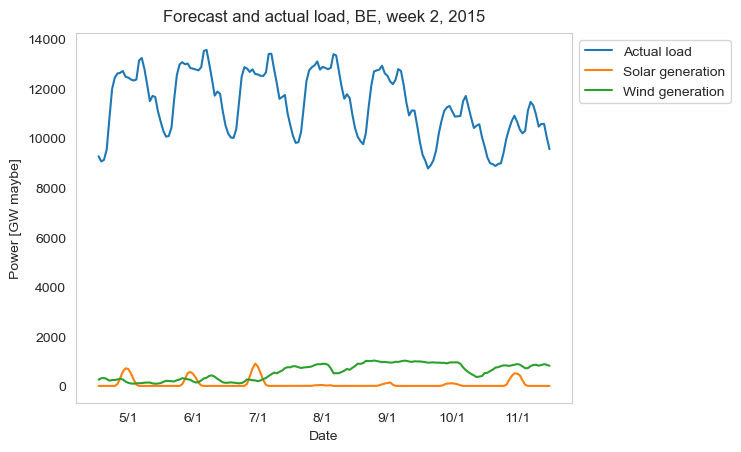

In [623]:
ax = plt.axes()
plt.plot(opsd_15.loc[:,"BE_load_actual_entsoe_transparency"][96:264],label = 'Actual load')
plt.plot(opsd_15.loc[:,"BE_solar_generation_actual"][96:264],label = 'Solar generation')
plt.plot(opsd_15.loc[:,"BE_wind_onshore_generation_actual"][96:264],label = 'Wind generation')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Forecast and actual load, BE, week 2, 2015', y=1.01)
plt.xlabel('Date')
plt.ylabel('Power [GW maybe]')
plt.grid()
ax.set_xticks(['2015-01-05 12:00:00+00','2015-01-06 12:00:00+00', '2015-01-07 12:00:00+00', '2015-01-08 12:00:00+00', '2015-01-09 12:00:00+00', '2015-01-10 12:00:00+00', '2015-01-11 12:00:00+00'])
ax.set_xticklabels(['5/1','6/1','7/1','8/1','9/1','10/1','11/1'])

## Finding hydro data for the countries

Hydro data are found for 2015 and 2016 on ENTSO-E transparency, https://transparency.entsoe.eu/generation/r2/actualGenerationPerProductionType/show?name=&defaultValue=false&viewType=TABLE&areaType=CTY&atch=false&datepicker-day-offset-select-dv-date-from_input=D&dateTime.dateTime=16.03.2016+00:00|CET|DAYTIMERANGE&dateTime.endDateTime=16.03.2016+00:00|CET|DAYTIMERANGE&area.values=CTY|10YFR-RTE------C!CTY|10YFR-RTE------C&productionType.values=B11&productionType.values=B12&dateTime.timezone=CET_CEST&dateTime.timezone_input=CET+(UTC+1)+/+CEST+(UTC+2)#
Data used is from run-of-river and water reservoir. Data is saved as .csv files and named, e.g. for DK in 2015: "DK_hydro_2015". Time values are in UTC.

In [624]:
# test = pd.read_csv('../Hydro production data/2015/AT_hydro_2015.csv') 
# test

All countries has data for every 60 mins except Austria, Hungary, Germany and Luxemburg, which has for every 15 mins. This will be averaged into an hourly value. 

In [625]:
import glob
#Importing file paths with glob

path = '../Hydro production data/'
hydro_file_paths_2015 = glob.glob(path + '2015/'+ '*.csv')
hydro_file_paths_2016 = glob.glob(path + '2016/'+ '*.csv')

## Testing how to get all dataframes to be hourly + get index to be DateTime
This is done by doing the test on only Austria first. 

In [626]:
# # Reading data for Austria, 2015
# AT_2015 = pd.read_csv('../Hydro production data/2015/AT_hydro_2015.csv')

# #Removing the last part of the timestamp - will only keep the starting time
# AT_2015['MTU'] = AT_2015['MTU'].map(lambda x: x.split('-')[0])

# #Changing index to DateTimeIndex
# AT_2015.index = pd.to_datetime(AT_2015['MTU'])

# # CHanging frequency to 1hr
# AT_2015.resample("1H").mean()

#### Conclusion on what to implement further in the for-loop
The "split" function must be done in the loop so that only the first part of the time is kept. Then, there should be an if-function that check whether the frequency is 1 hr. If NOT the index needs to be changed to DateTimeIndex and the "resample" function needs to be used. 

Back in the for-loop, the columns 2 and 3 must be concated.
Also in the for-loop, the column header must be changed for all so that the country name is a part of it. 


Since the first file in hydro_15 is AT, which has a frequency of 30 mins, the same stuff has to be done before the for-loop to initialize a dataframe that is correct before concating

## For-loop that reads the data into one big dataframe with DateTimeIndex, freq = 1H

### Initializing - making the AT-Dataframe correct

In [627]:
hydro_2015 = pd.read_csv(hydro_file_paths_2015[0])
hydro_2016 = pd.read_csv(hydro_file_paths_2016[0])

#Removing the last part of the timestamp - will only keep the starting time
hydro_2015['MTU'] = hydro_2015['MTU'].map(lambda x: x.split('-')[0])
hydro_2016['MTU'] = hydro_2016['MTU'].map(lambda x: x.split('-')[0])

#Changing index to DateTimeIndex
hydro_2015.index = pd.to_datetime(hydro_2015['MTU'])
hydro_2016.index = pd.to_datetime(hydro_2016['MTU'])

#Changing NaN and n/e to 0
hydro_2015 = hydro_2015.fillna(0)
hydro_2015 = hydro_2015.replace('n/e',0)
hydro_2016 = hydro_2016.fillna(0)
hydro_2016 = hydro_2016.replace('n/e',0)

#Changing name of columns so they include country code
hydro_2015.columns = ['del','del','AT Run-of-river - Actual [MW]','AT Water Reservoir - Actual [MW]']
hydro_2016.columns = ['del','del','AT Run-of-river - Actual [MW]','AT Water Reservoir - Actual [MW]']

hydro_2015 = hydro_2015.drop(['del'],axis=1)
hydro_2016 = hydro_2016.drop(['del'],axis=1)

# CHanging frequency to 1hr
hydro_2015 = hydro_2015.resample("1H").mean()
hydro_2016 = hydro_2016.resample("1H").mean()

hydro_2016

,AT Run-of-river - Actual [MW],AT Water Reservoir - Actual [MW]
MTU,,
2016-01-01 00:00:00,1192.00,171.75
2016-01-01 01:00:00,1196.50,151.50
2016-01-01 02:00:00,1203.75,173.00
2016-01-01 03:00:00,1214.25,143.50
2016-01-01 04:00:00,1225.25,161.00
...,...,...
2016-12-31 19:00:00,1841.25,258.25
2016-12-31 20:00:00,1806.25,225.50
2016-12-31 21:00:00,1640.50,565.50


### Making for-loop that does it for it all

For-loop that starts from Belgium. 

In [628]:
Country_codes = ['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GE', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MD', 'ME', 'MK', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SK', 'SL', 'UA', 'XK']
i = 1    #Initializing iteration counter

for filename in range(len(hydro_file_paths_2015)-1):
    print(i,'-',Country_codes[i])
    temporary_hydro_15 = pd.read_csv(hydro_file_paths_2015[i])    #Loading current file 
    temporary_hydro_16 = pd.read_csv(hydro_file_paths_2016[i])    #Loading current file 
    
    #Removing the last part of the timestamp - will only keep the starting time
    temporary_hydro_15['MTU'] = temporary_hydro_15['MTU'].map(lambda x: x.split('-')[0])
    temporary_hydro_16['MTU'] = temporary_hydro_16['MTU'].map(lambda x: x.split('-')[0])
    
    #Changing index to DateTimeIndex
    temporary_hydro_15.index = pd.to_datetime(temporary_hydro_15['MTU'])
    temporary_hydro_16.index = pd.to_datetime(temporary_hydro_16['MTU'])

    #Changing NaN and n/e to 0
    temporary_hydro_15 = temporary_hydro_15.fillna(0)
    temporary_hydro_15 = temporary_hydro_15.replace('n/e',0)
    temporary_hydro_16 = temporary_hydro_16.fillna(0)
    temporary_hydro_16 = temporary_hydro_16.replace('n/e',0)
    
    #Defining name for column
    col1name = Country_codes[i] + ' Run-of-river - Actual [MW]'
    col2name = Country_codes[i] + ' Water Reservoir - Actual [MW]'
    
    temporary_hydro_15.columns = ['del','del',col1name,col2name]
    temporary_hydro_16.columns = ['del','del',col1name,col2name]
    
    temporary_hydro_15 = temporary_hydro_15.drop(['del'],axis=1)
    temporary_hydro_16 = temporary_hydro_16.drop(['del'],axis=1)
    
    # IF STATEMENT FOR COUNTRIES WITH MORE THAN HOURLY RESOLUTION
    if temporary_hydro_15.shape[0] != 8760:

        # Changing frequency to 1hr
        temporary_hydro_15 = temporary_hydro_15.resample("1H").mean()
        temporary_hydro_16 = temporary_hydro_16.resample("1H").mean()
    
    hydro_2015 = pd.concat([hydro_2015,temporary_hydro_15],axis=1,copy=False)
    hydro_2016 = pd.concat([hydro_2016,temporary_hydro_16],axis=1,copy=False)
    i=i+1

1 - BE
2 - BG
3 - CH
4 - CY
5 - CZ
6 - DE
7 - DK
8 - EE
9 - ES
10 - FI
11 - FR
12 - GB
13 - GE
14 - GR
15 - HR
16 - HU
17 - IE
18 - IT
19 - LT
20 - LU
21 - LV
22 - MD
23 - ME
24 - MK
25 - NL
26 - NO
27 - PL
28 - PT
29 - RO
30 - RS
31 - SE
32 - SK
33 - SL
34 - UA
35 - XK


In [629]:
hydro_2015

,AT Run-of-river - Actual [MW],AT Water Reservoir - Actual [MW],BE Run-of-river - Actual [MW],BE Water Reservoir - Actual [MW],BG Run-of-river - Actual [MW],BG Water Reservoir - Actual [MW],CH Run-of-river - Actual [MW],CH Water Reservoir - Actual [MW],CY Run-of-river - Actual [MW],CY Water Reservoir - Actual [MW],CZ Run-of-river - Actual [MW],CZ Water Reservoir - Actual [MW],DE Run-of-river - Actual [MW],DE Water Reservoir - Actual [MW],DK Run-of-river - Actual [MW],DK Water Reservoir - Actual [MW],EE Run-of-river - Actual [MW],EE Water Reservoir - Actual [MW],ES Run-of-river - Actual [MW],ES Water Reservoir - Actual [MW],FI Run-of-river - Actual [MW],FI Water Reservoir - Actual [MW],FR Run-of-river - Actual [MW],FR Water Reservoir - Actual [MW],GB Run-of-river - Actual [MW],GB Water Reservoir - Actual [MW],GE Run-of-river - Actual [MW],GE Water Reservoir - Actual [MW],GR Run-of-river - Actual [MW],GR Water Reservoir - Actual [MW],HR Run-of-river - Actual [MW],HR Water Reservoir - Actual [MW],HU Run-of-river - Actual [MW],HU Water Reservoir - Actual [MW],IE Run-of-river - Actual [MW],IE Water Reservoir - Actual [MW],IT Run-of-river - Actual [MW],IT Water Reservoir - Actual [MW],LT Run-of-river - Actual [MW],LT Water Reservoir - Actual [MW],LU Run-of-river - Actual [MW],LU Water Reservoir - Actual [MW],LV Run-of-river - Actual [MW],LV Water Reservoir - Actual [MW],MD Run-of-river - Actual [MW],MD Water Reservoir - Actual [MW],ME Run-of-river - Actual [MW],ME Water Reservoir - Actual [MW],MK Run-of-river - Actual [MW],MK Water Reservoir - Actual [MW],NL Run-of-river - Actual [MW],NL Water Reservoir - Actual [MW],NO Run-of-river - Actual [MW],NO Water Reservoir - Actual [MW],PL Run-of-river - Actual [MW],PL Water Reservoir - Actual [MW],PT Run-of-river - Actual [MW],PT Water Reservoir - Actual [MW],RO Run-of-river - Actual [MW],RO Water Reservoir - Actual [MW],RS Run-of-river - Actual [MW],RS Water Reservoir - Actual [MW],SE Run-of-river - Actual [MW],SE Water Reservoir - Actual [MW],SK Run-of-river - Actual [MW],SK Water Reservoir - Actual [MW],SL Run-of-river - Actual [MW],SL Water Reservoir - Actual [MW],UA Run-of-river - Actual [MW],UA Water Reservoir - Actual [MW],XK Run-of-river - Actual [MW],XK Water Reservoir - Actual [MW]
MTU,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,1489.75,218.00,36,0,0.0,475,0.0,0.0,0.0,0.0,96.0,30.0,1127.25,60.75,0,0,3.0,0,1009.0,1658.0,668.0,0,4229.0,3732.0,0.0,0.0,0,0,0,0,0.0,0.0,14.0,17.0,133.0,0.0,0.0,0.0,0.0,0,16.00,0.00,0,1,0,0,0,0.0,0,0,0.0,0.0,1238.0,10477.0,0.0,0.0,967,705,0.0,0.0,0.0,0.0,0,0.0,277.0,0.0,242,0,0,0,0,0
2015-01-01 01:00:00,1459.75,180.50,36,0,0.0,378,0.0,0.0,0.0,0.0,96.0,30.0,1119.00,20.25,0,0,3.0,0,973.0,1371.0,669.0,0,4007.0,3046.0,0.0,0.0,0,0,0,0,0.0,0.0,14.0,17.0,132.0,0.0,0.0,0.0,0.0,0,15.75,0.00,0,0,0,0,0,0.0,0,0,0.0,0.0,1230.0,10123.0,0.0,0.0,568,474,0.0,0.0,0.0,0.0,0,0.0,278.0,0.0,104,0,0,0,0,0
2015-01-01 02:00:00,1429.75,223.25,36,0,0.0,295,0.0,0.0,0.0,0.0,96.0,30.0,1115.75,6.75,0,0,3.0,0,949.0,779.0,605.0,0,3787.0,1726.0,0.0,0.0,0,0,0,0,0.0,0.0,14.0,17.0,131.5,0.0,0.0,0.0,0.0,0,15.25,0.00,0,0,0,0,0,0.0,0,0,0.0,0.0,1232.0,9897.0,0.0,0.0,392,401,0.0,0.0,0.0,0.0,0,0.0,278.0,0.0,83,0,0,0,0,0
2015-01-01 03:00:00,1447.50,277.75,37,0,0.0,290,0.0,0.0,0.0,0.0,96.0,30.0,1110.75,1.25,0,0,3.0,0,953.0,720.0,594.0,0,3654.0,810.0,0.0,0.0,0,0,0,0,0.0,0.0,14.0,17.0,131.5,0.0,0.0,0.0,0.0,0,15.00,0.00,0,0,0,0,0,0.0,0,0,0.0,0.0,1234.0,9697.0,0.0,0.0,404,168,0.0,0.0,0.0,0.0,0,0.0,278.0,0.0,80,0,0,0,0,0
2015-01-01 04:00:00,1448.25,252.75,37,0,0.0,272,0.0,0.0,0.0,0.0,96.0,30.0,1106.25,1.50,0,0,3.0,0,952.0,743.0,648.0,0,3594.0,1090.0,0.0,0.0,0,0,0,0,0.0,0.0,13.0,16.0,133.5,0.0,0.0,0.0,0.0,0,15.00,0.00,0,0,0,0,0,0.0,0,0,0.0,0.0,1228.0,9784.0,0.0,0.0,410,152,0.0,0.0,0.0,0.0,0,0.0,280.0,0.0,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [630]:
hydro_2016

,AT Run-of-river - Actual [MW],AT Water Reservoir - Actual [MW],BE Run-of-river - Actual [MW],BE Water Reservoir - Actual [MW],BG Run-of-river - Actual [MW],BG Water Reservoir - Actual [MW],CH Run-of-river - Actual [MW],CH Water Reservoir - Actual [MW],CY Run-of-river - Actual [MW],CY Water Reservoir - Actual [MW],CZ Run-of-river - Actual [MW],CZ Water Reservoir - Actual [MW],DE Run-of-river - Actual [MW],DE Water Reservoir - Actual [MW],DK Run-of-river - Actual [MW],DK Water Reservoir - Actual [MW],EE Run-of-river - Actual [MW],EE Water Reservoir - Actual [MW],ES Run-of-river - Actual [MW],ES Water Reservoir - Actual [MW],FI Run-of-river - Actual [MW],FI Water Reservoir - Actual [MW],FR Run-of-river - Actual [MW],FR Water Reservoir - Actual [MW],GB Run-of-river - Actual [MW],GB Water Reservoir - Actual [MW],GE Run-of-river - Actual [MW],GE Water Reservoir - Actual [MW],GR Run-of-river - Actual [MW],GR Water Reservoir - Actual [MW],HR Run-of-river - Actual [MW],HR Water Reservoir - Actual [MW],HU Run-of-river - Actual [MW],HU Water Reservoir - Actual [MW],IE Run-of-river - Actual [MW],IE Water Reservoir - Actual [MW],IT Run-of-river - Actual [MW],IT Water Reservoir - Actual [MW],LT Run-of-river - Actual [MW],LT Water Reservoir - Actual [MW],LU Run-of-river - Actual [MW],LU Water Reservoir - Actual [MW],LV Run-of-river - Actual [MW],LV Water Reservoir - Actual [MW],MD Run-of-river - Actual [MW],MD Water Reservoir - Actual [MW],ME Run-of-river - Actual [MW],ME Water Reservoir - Actual [MW],MK Run-of-river - Actual [MW],MK Water Reservoir - Actual [MW],NL Run-of-river - Actual [MW],NL Water Reservoir - Actual [MW],NO Run-of-river - Actual [MW],NO Water Reservoir - Actual [MW],PL Run-of-river - Actual [MW],PL Water Reservoir - Actual [MW],PT Run-of-river - Actual [MW],PT Water Reservoir - Actual [MW],RO Run-of-river - Actual [MW],RO Water Reservoir - Actual [MW],RS Run-of-river - Actual [MW],RS Water Reservoir - Actual [MW],SE Run-of-river - Actual [MW],SE Water Reservoir - Actual [MW],SK Run-of-river - Actual [MW],SK Water Reservoir - Actual [MW],SL Run-of-river - Actual [MW],SL Water Reservoir - Actual [MW],UA Run-of-river - Actual [MW],UA Water Reservoir - Actual [MW],XK Run-of-river - Actual [MW],XK Water Reservoir - Actual [MW]
MTU,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,1192.00,171.75,24,0,0.0,60,32.0,318,0.0,0.0,107.0,32.0,970.50,60.50,0,0,3.0,0,682.0,1840.0,1144.0,0,2562.0,555.0,756.5,0.0,0,0,0,0,0.0,0.0,10.0,14.0,185.5,0.0,1163,81,22.0,0,8.00,0.00,0.0,0,0,0,0,0,0,0,0.0,0.0,1270,14157,112,0,577,74,329.0,706.0,0.0,0.0,0,5102,100.0,0.0,75,0,0,0,0,0
2016-01-01 01:00:00,1196.50,151.50,24,0,0.0,60,32.0,308,0.0,0.0,107.0,32.0,967.75,61.50,0,0,3.0,0,660.0,1343.0,1210.0,0,2514.0,378.0,644.5,0.0,0,0,0,0,0.0,0.0,10.0,14.0,188.0,0.0,1089,20,22.0,0,8.75,0.00,0.0,0,0,0,0,0,0,0,0.0,0.0,1271,13636,112,0,374,104,321.0,595.0,0.0,0.0,0,4981,101.0,0.0,49,0,0,0,0,0
2016-01-01 02:00:00,1203.75,173.00,24,0,0.0,58,31.0,299,0.0,0.0,108.0,31.0,954.50,62.25,0,0,3.0,0,651.0,906.0,1143.0,0,2602.0,200.0,642.5,0.0,0,0,0,0,0.0,0.0,10.0,14.0,186.5,0.0,1010,20,22.0,0,8.75,0.00,0.0,0,0,0,0,0,0,0,0.0,0.0,1268,13147,112,0,371,98,341.0,422.0,0.0,0.0,0,4964,100.0,0.0,45,0,0,0,0,0
2016-01-01 03:00:00,1214.25,143.50,24,0,0.0,58,31.0,295,0.0,0.0,108.0,31.0,949.00,48.75,0,0,3.0,0,626.0,545.0,1153.0,0,2676.0,390.0,712.0,0.0,0,0,0,0,0.0,0.0,10.0,14.0,173.5,0.0,988,20,22.0,0,9.00,0.00,0.0,0,0,0,0,0,0,0,0.0,0.0,1275,13032,112,0,311,69,353.0,419.0,0.0,0.0,0,4957,100.0,0.0,45,0,0,0,0,0
2016-01-01 04:00:00,1225.25,161.00,24,0,0.0,63,31.0,309,0.0,0.0,104.0,42.0,941.50,53.75,0,0,3.0,0,616.0,446.0,1137.0,0,2662.0,238.0,927.0,0.0,0,0,0,0,0.0,0.0,10.0,14.0,174.0,0.0,1001,24,22.0,0,8.75,0.00,0.0,0,0,0,0,0,0,0,0.0,0.0,1274,13474,111,0,237,68,350.0,403.0,0.0,0.0,0,5174,101.0,0.0,45,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..